In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('car_price_dataset.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [5]:
df.shape

(10000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [9]:
df.describe(include=['object'])

,Brand,Model,Fuel_Type,Transmission
count,10000,10000,10000,10000
unique,10,30,4,3
top,Ford,Accord,Electric,Manual
freq,1048,365,2625,3372


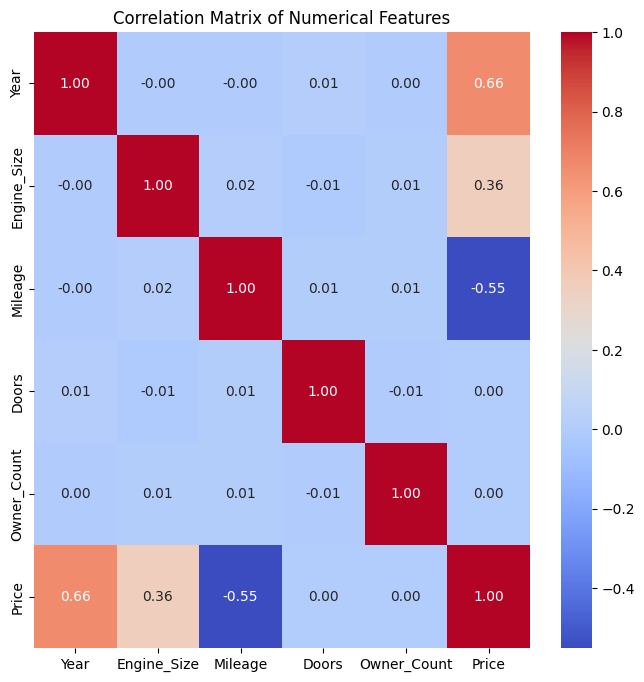

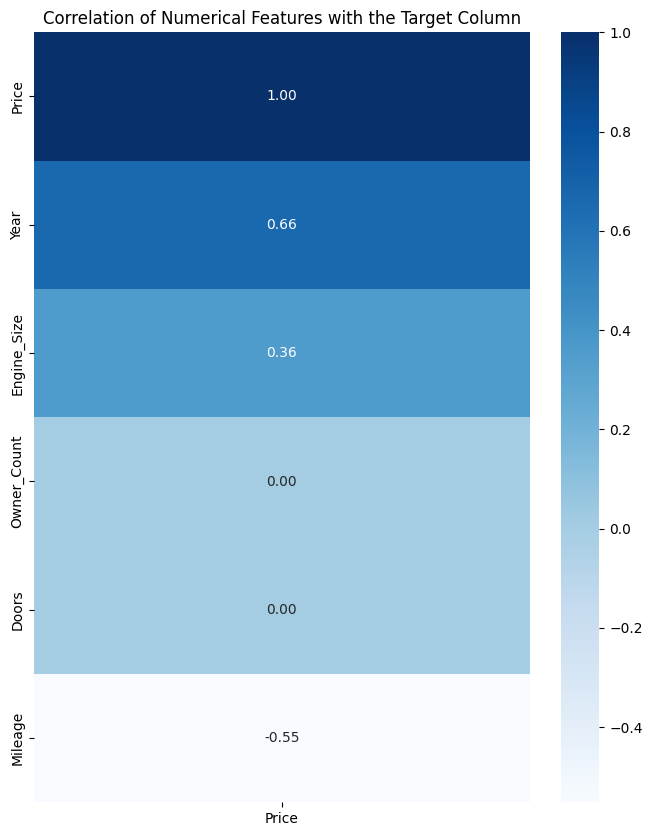

In [10]:
num_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(8,8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()
# Correlation of numerical features with the target column
plt.figure(figsize=(8,10))
corr = num_df.corr()[['Price']].sort_values(by='Price', ascending=False)
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='Blues'
)
plt.title('Correlation of Numerical Features with the Target Column')
plt.show()

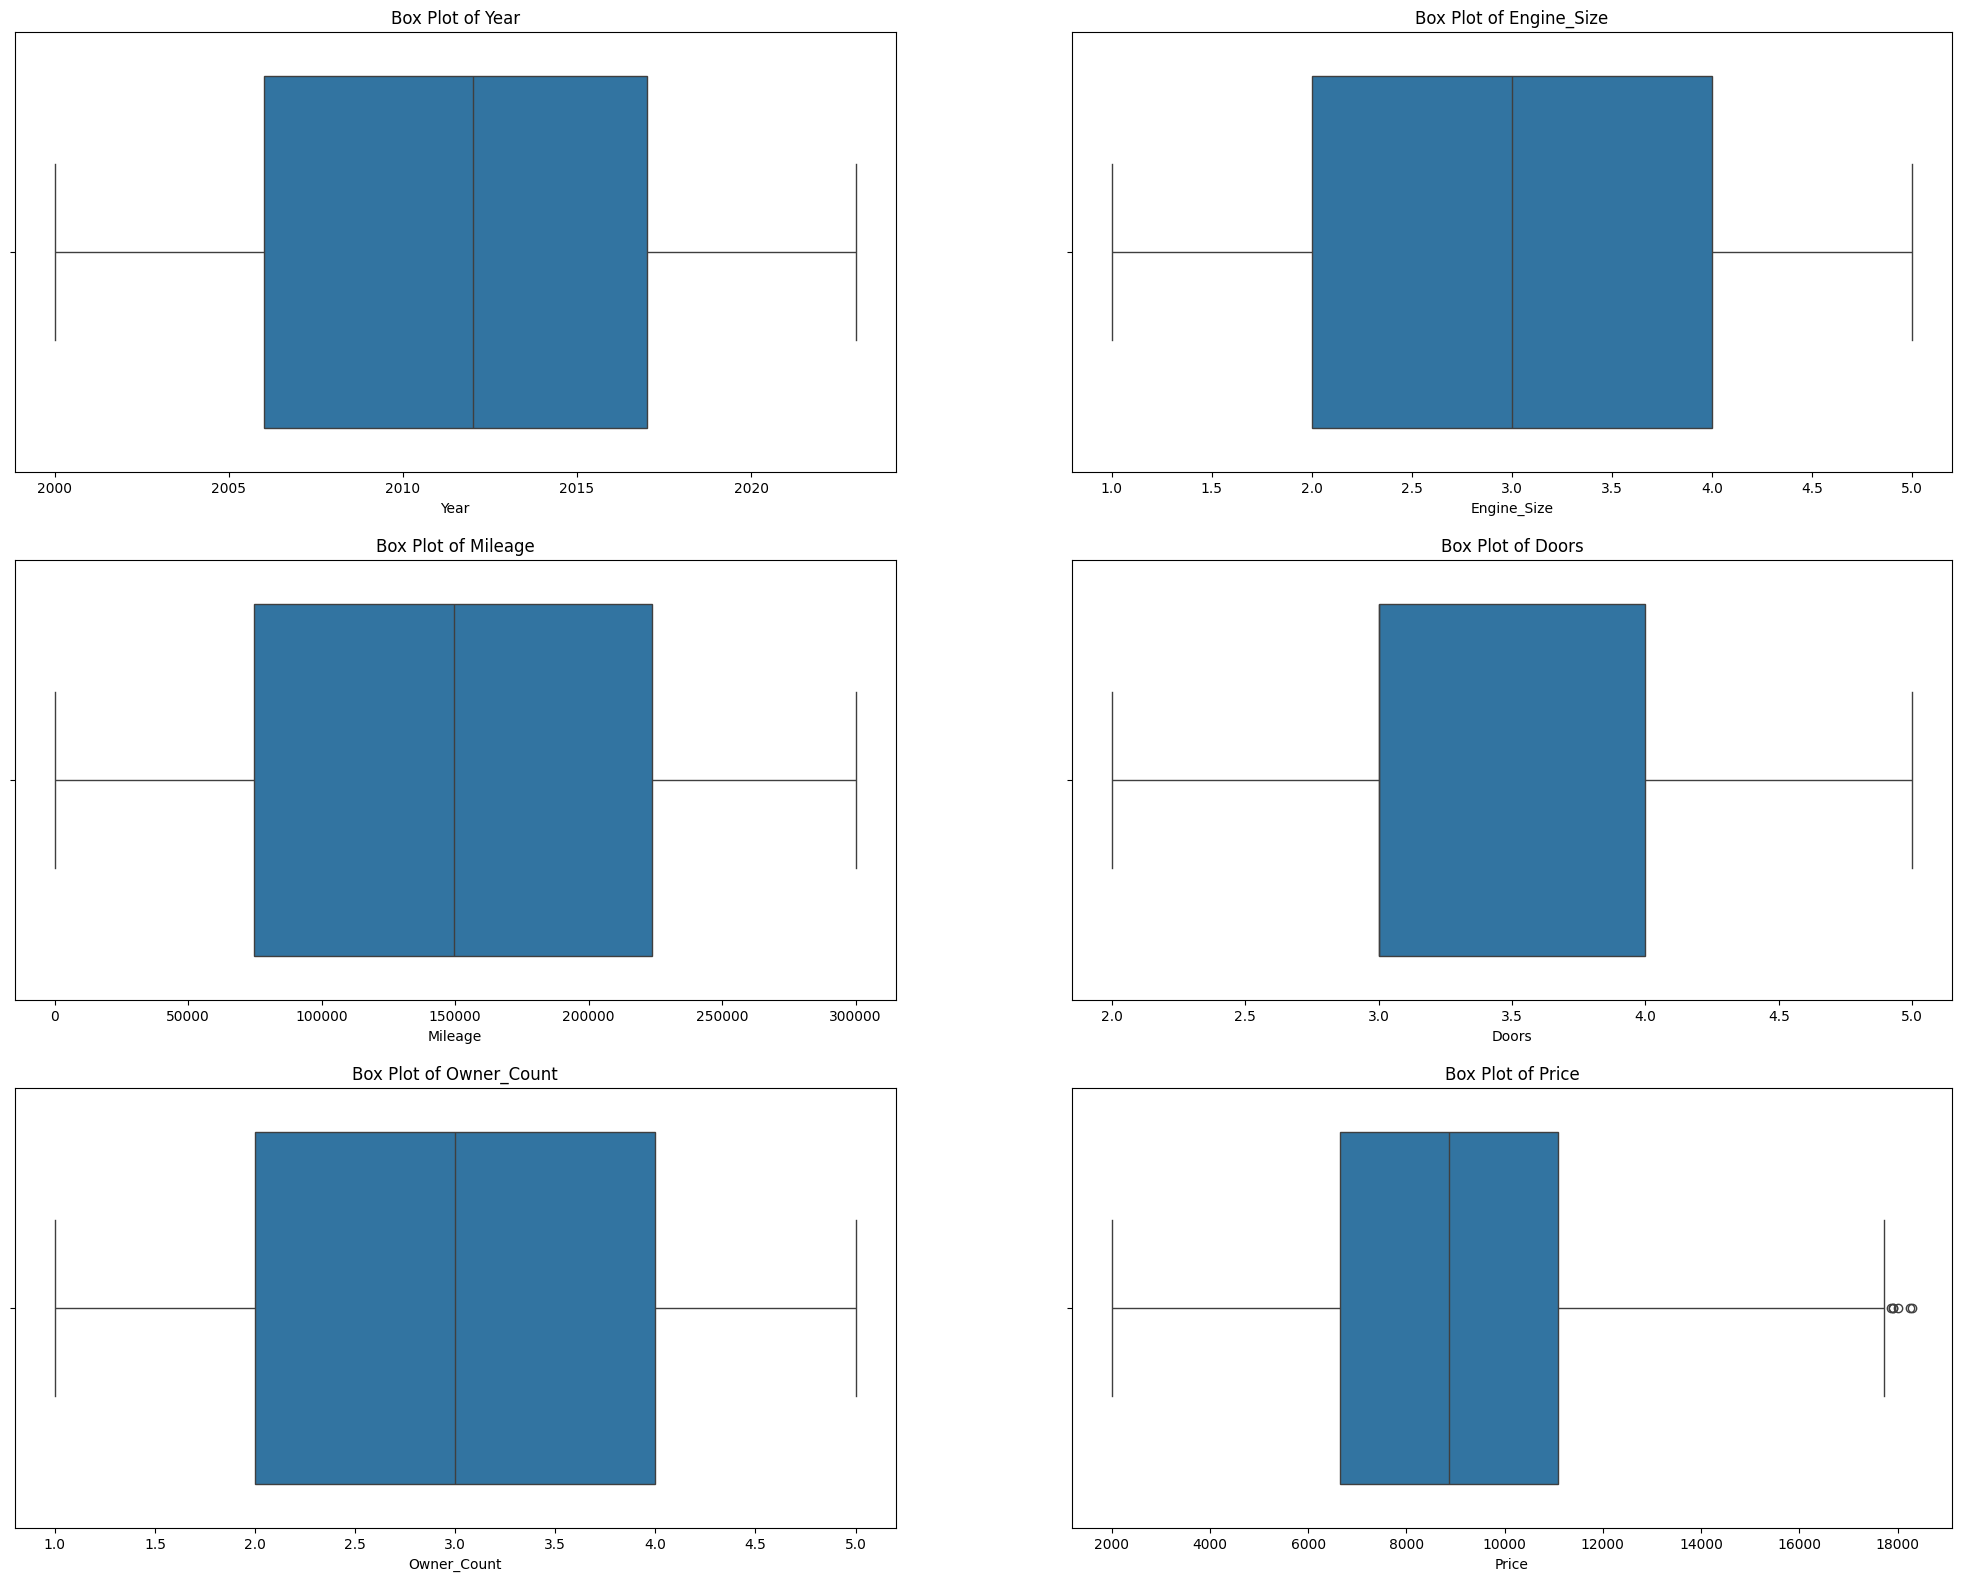

In [11]:
plt.figure(figsize=(25,40))
for idx, feature in enumerate(num_df.columns):
  plt.subplot(6, 2, idx + 1)
  sns.boxplot(data=num_df, x=feature, orient='h')
  plt.title(f'Box Plot of {feature}')
plt.show()

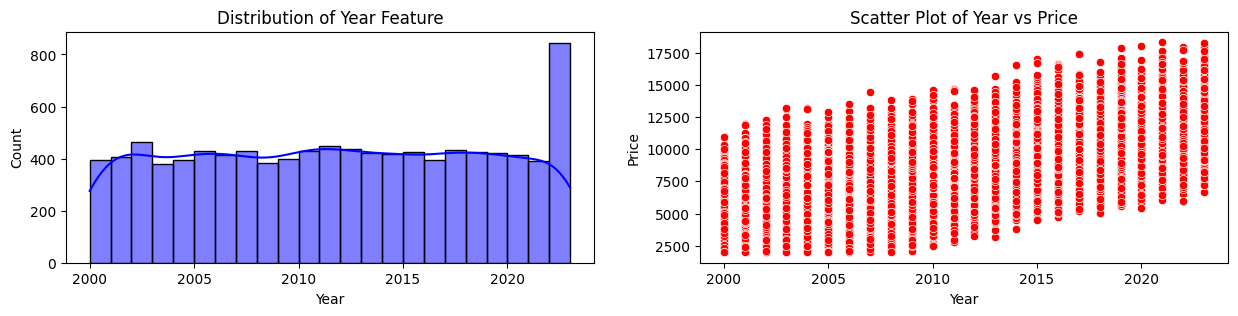

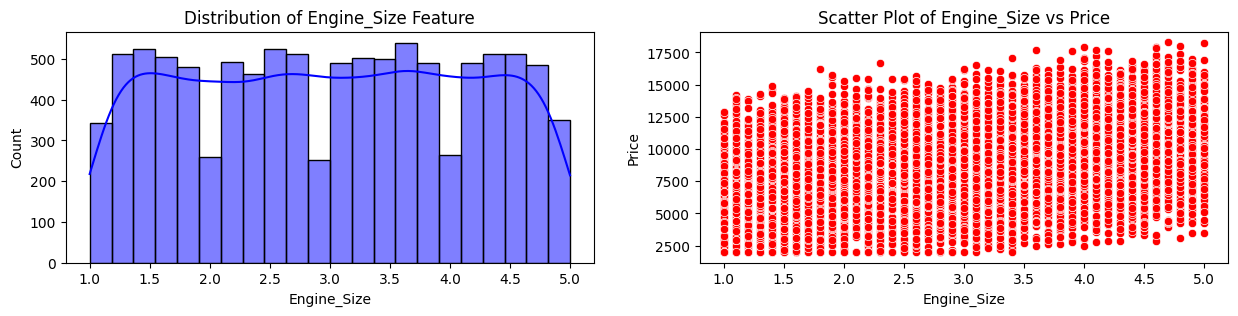

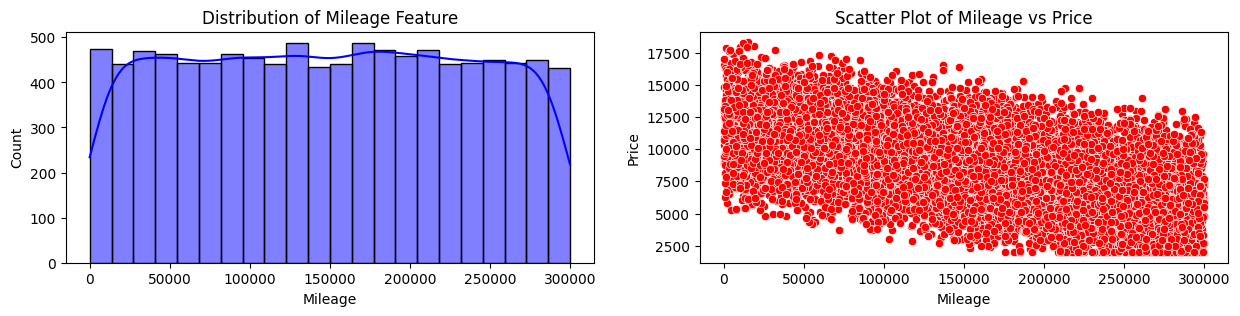

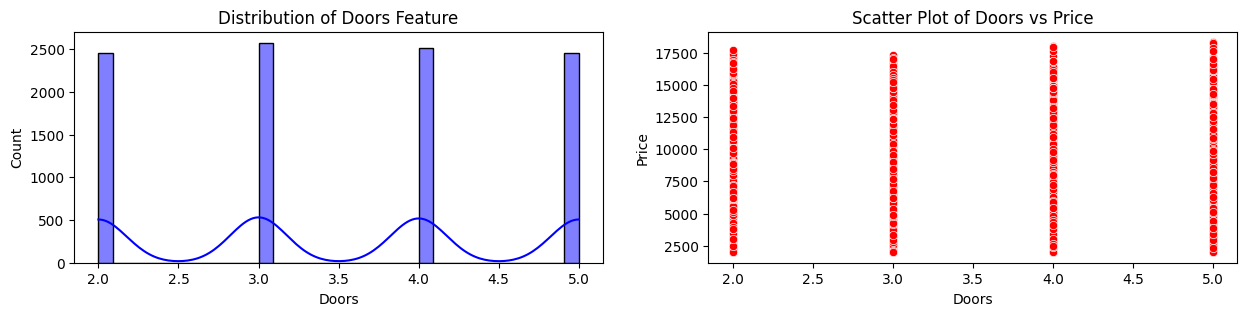

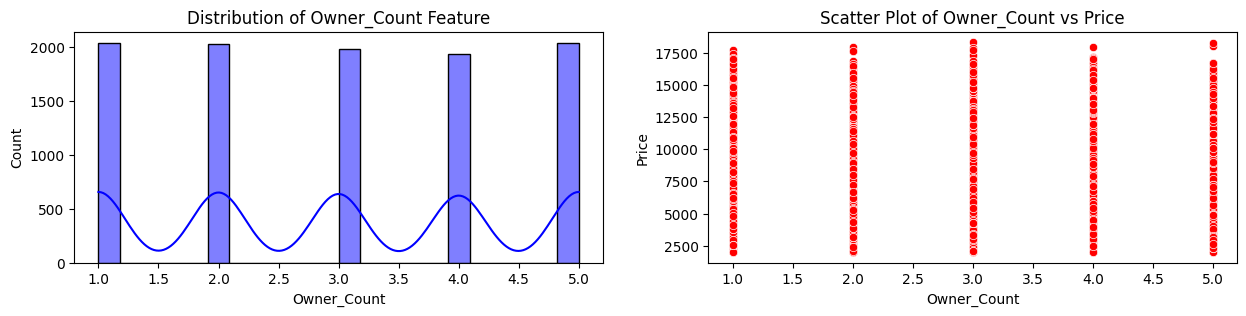

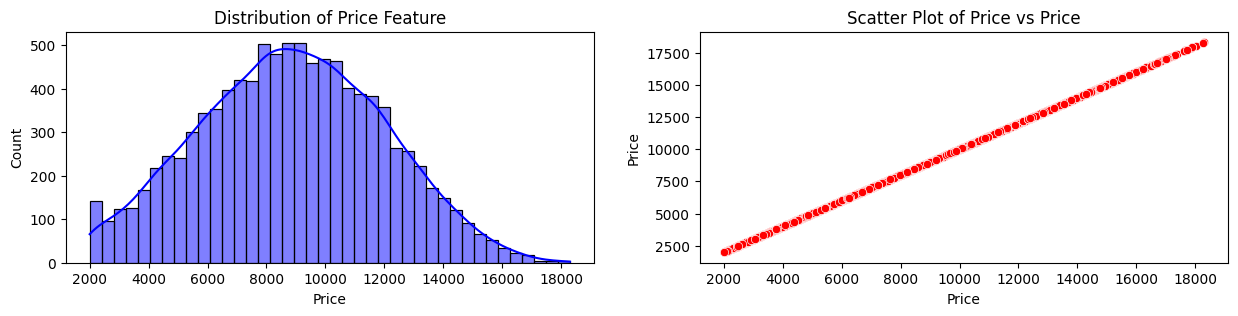

In [12]:
for col in num_df.columns:
  plt.figure(figsize=(15,3))
  plt.subplot(1, 2, 1)
  sns.histplot(data=num_df, x=col, kde=True, color='blue')
  plt.title(f'Distribution of {col} Feature')
  plt.subplot(1, 2, 2)
  sns.scatterplot(data=num_df, x=col, y='Price', color='red')
  plt.title(f'Scatter Plot of {col} vs Price')


In [13]:
cat_df = df.select_dtypes(include=['object'])
cat_df.head()

,Brand,Model,Fuel_Type,Transmission
0,Kia,Rio,Diesel,Manual
1,Chevrolet,Malibu,Hybrid,Automatic
2,Mercedes,GLA,Diesel,Automatic
3,Audi,Q5,Electric,Manual
4,Volkswagen,Golf,Hybrid,Semi-Automatic


Text(0.5, 1.0, 'Distribution of Fuel_Type')

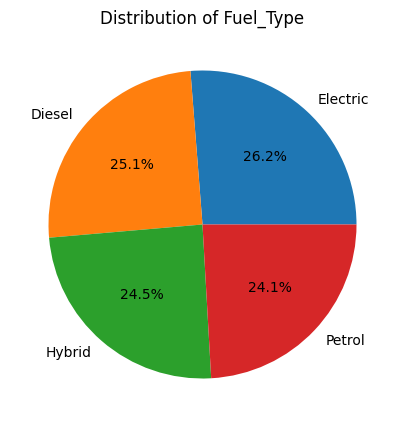

In [14]:
count_value = cat_df['Fuel_Type'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(5,5))
plt.pie(count_value, labels=count_value.index, autopct="%1.1f%%")
plt.title('Distribution of Fuel_Type')

Text(0.5, 1.0, 'Distribution of Transmission')

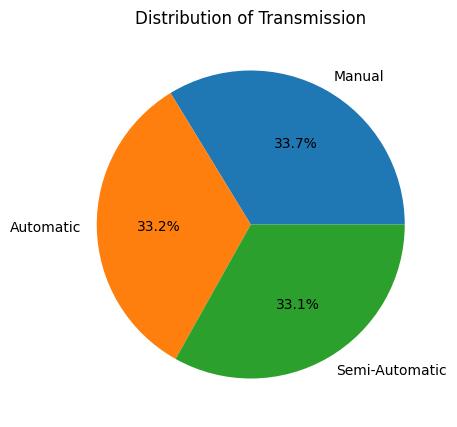

In [15]:
count_value = cat_df['Transmission'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(5,5))
plt.pie(count_value, labels=count_value.index, autopct="%1.1f%%")
plt.title('Distribution of Transmission')

In [16]:
def group_high_cardinality(series, N):
  top_n = series.value_counts().index[:N]

  series_grouped = series.apply(lambda x: x if x in top_n else 'Other')
  return series_grouped

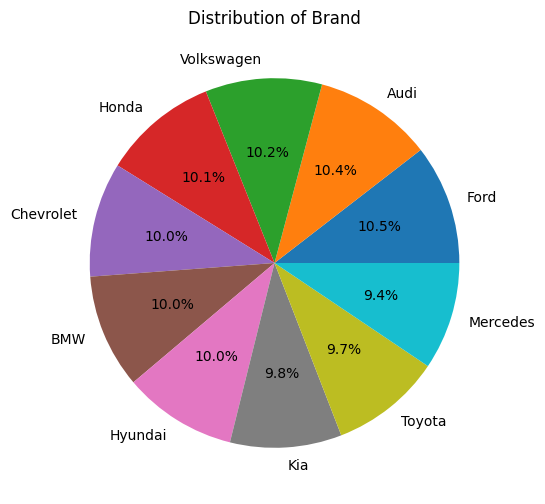

In [17]:
grouped_brand = group_high_cardinality(cat_df['Brand'], 10)
grouped_brand_counts = grouped_brand.value_counts()

plt.figure(figsize=(6, 6))
plt.pie(grouped_brand_counts, labels=grouped_brand_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Brand')
plt.show()

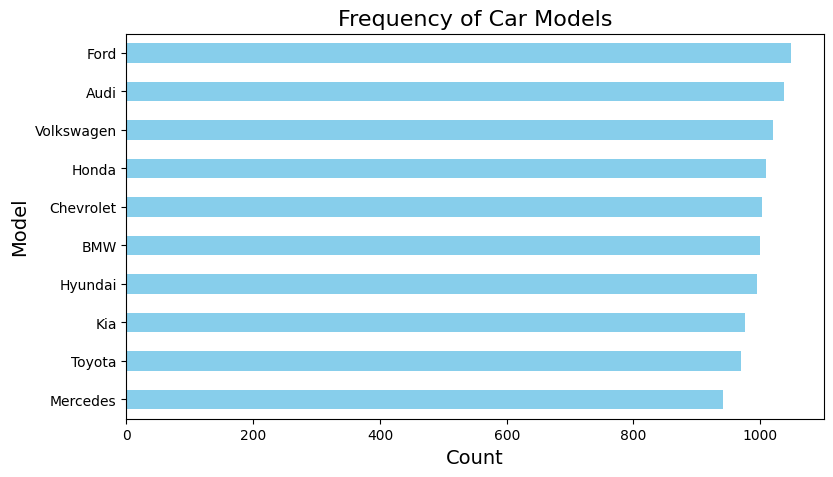

In [18]:
value_counts = cat_df['Brand'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(9,5))
value_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Car Models', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

In [21]:
# Counting number of Price column outliers
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

count_outliers = df[(df.Price < lower_bound) | (df.Price > upper_bound)].shape[0]
print(f"Number of outliers in Price column: {count_outliers}")
#
clean_df = df[(df.Price > lower_bound) & (df.Price < upper_bound)]

Number of outliers in Price column: 6


In [22]:
clean_df = clean_df.drop(['Doors', 'Owner_Count'], axis=1)
clean_df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,2867


In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
for col in cat_df.columns:
  clean_df[col] = le.fit_transform(clean_df[col])


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Price
0,6,24,2020,4.2,0,1,289944,8501
1,2,19,2012,2.0,2,0,5356,12092
2,7,16,2020,4.2,0,0,231440,11171
3,0,22,2023,2.0,1,1,160971,11780
4,9,17,2003,2.6,2,2,286618,2867
...,...,...,...,...,...,...,...,...
9995,6,20,2004,3.7,0,2,5794,8884
9996,2,18,2002,1.4,1,0,168000,6240
9997,1,0,2010,3.0,3,0,86664,9866
9998,3,13,2002,1.4,2,0,225772,4084


In [24]:
X = clean_df.iloc[:, :7]
y = clean_df.iloc[:, 7]

In [25]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.53618152,  1.10695812,  1.22726447, ..., -1.32864464,
         0.        ,  1.62987044],
       [-0.85223618,  0.52854006,  0.0670293 , ...,  0.47146036,
        -1.22849978, -1.66861635],
       [ 0.88328594,  0.18148923,  1.22726447, ..., -1.32864464,
        -1.22849978,  0.95178608],
       ...,
       [-1.1993406 , -1.66944856, -0.2230295 , ...,  1.37151286,
        -1.22849978, -0.72622467],
       [-0.50513175, -0.16556161, -1.38326467, ...,  0.47146036,
        -1.22849978,  0.88609173],
       [ 1.57749479,  1.45400896, -1.52829407, ..., -1.32864464,
         0.        ,  0.09921995]])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {RMSE:.2f}")


Test RMSE: 915.16


In [27]:
coefficients = model.coef_
for coef in coefficients:
  print(f"{coef:.2f}")

0.20
5.72
2055.12
1134.67
-112.70
-614.89
-1716.80


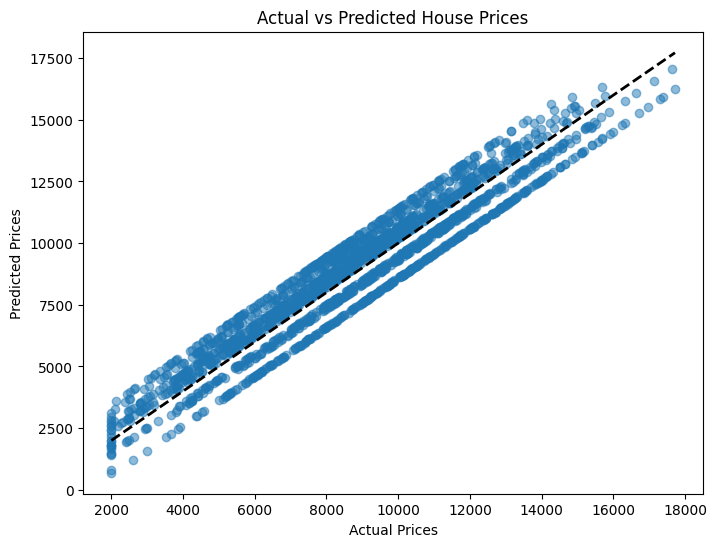

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [29]:
baseline_pred = [np.mean(y)] * len(y)
baseline_rmse = np.sqrt(mean_squared_error(y, baseline_pred))
print(f"Baseline RMSE: {baseline_rmse}")

Baseline RMSE: 3105.2164898141227


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}, RMSE: {rmse}, R2 Score: {r2}')

MAE: 347.1282791395698, RMSE: 438.2130074173802, R2 Score: 0.9796018304938993


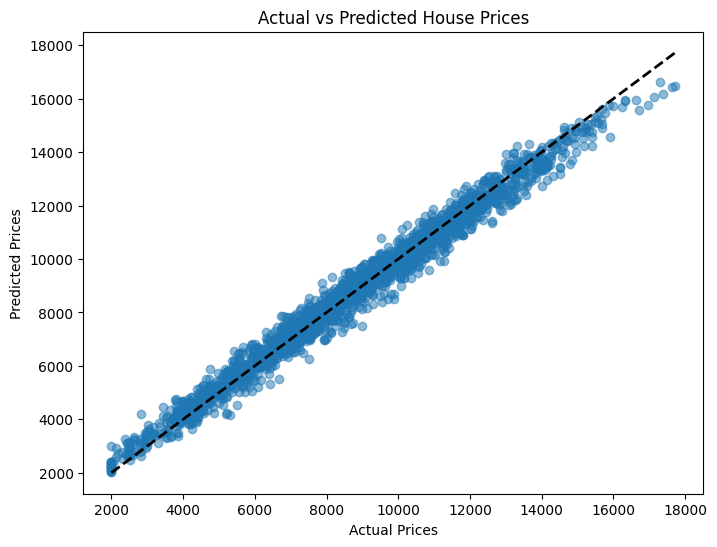

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()